In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
%%cpp -d

#include "../sPHENIXStyle/sPhenixStyle.C"
#include "SaveCanvas.C"

In [3]:
%%cpp

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [4]:
# DSTReader = ROOT.TFile.Open('../../../macros2/G4EICDetector.root_DSTReader.root')
DSTReader = ROOT.TFile.Open('data/G4EICDetector.root_DSTReader_synrad_valid_flatphoton_AuCoating_10M.root')
T = DSTReader.Get('T')

In [5]:
T.Show(3)

======> EVENT:3
 n_G4HIT_SVTX    = 0
 n_G4HIT_PIPE    = 0
 n_G4HIT_PIPE_Au = 0
 n_PHG4Particle  = 1
 PHG4Particle    = 1
 PHG4Particle.fUniqueID = 0
 PHG4Particle.fBits = 33554432
 PHG4Particle.fname = gamma
 PHG4Particle.fpid = 22
 PHG4Particle.fpx = 5.40879e-48
 PHG4Particle.fpy = -1.96843e-48
 PHG4Particle.fpz = -7.73619e-05
 PHG4Particle.barcode = -1
 PHG4Particle.trkid = 1
 PHG4Particle.vtxid = 1
 PHG4Particle.parentid = 0
 PHG4Particle.primaryid = 1
 PHG4Particle.fe = 7.73619e-05
 n_PHG4VtxPoint  = 1
 PHG4VtxPoint    = 1
 PHG4VtxPoint.fUniqueID = 0
 PHG4VtxPoint.fBits = 33554432
 PHG4VtxPoint.vx = 0.0229966
 PHG4VtxPoint.vy = -0.069262
 PHG4VtxPoint.vz = 450
 PHG4VtxPoint.t0 = 0
 PHG4VtxPoint.id = 1


In [6]:
T.SetAlias('PhotonkeV','Sum$(PHG4Particle.fe * (PHG4Particle.trkid == 1))*1e6')

hAllPhoton = ROOT.TH1D('hAllPhoton', ';Photon Energy [keV]', 1000, 0, 100);
hPhotonSilicon = ROOT.TH1D('hPhotonSilicon', ';Photon Energy [keV]', 1000, 0, 100);
hPhotonBe = ROOT.TH1D('hPhotonBe', ';Photon Energy [keV]', 1000, 0, 100);
hPhotonAu = ROOT.TH1D('hPhotonAu', ';Photon Energy [keV]', 1000, 0, 100);

T.Draw('PhotonkeV >> hAllPhoton','',"goff");
T.Draw('PhotonkeV >> hPhotonSilicon','n_G4HIT_SVTX>0',"goff");
T.Draw('PhotonkeV >> hPhotonBe','n_G4HIT_PIPE>0',"goff");
T.Draw('PhotonkeV >> hPhotonAu','n_G4HIT_PIPE_Au>0',"goff");

Save TH1 hAllPhoton
Save TH1 hPhotonSilicon
Save TH1 hPhotonBe
Save TH1 hPhotonAu
removed ‘PhotonIneraction.svg’


Info in <TCanvas::Print>: png file PhotonIneraction.png has been created
Info in <TCanvas::SaveAs>: ROOT file PhotonIneraction.root has been created
Info in <TCanvas::Print>: eps file PhotonIneraction.eps has been created
Info in <TCanvas::Print>: SVG file PhotonIneraction.svg has been created
Info in <TCanvas::SaveSource>: C++ Macro file: PhotonIneraction.C has been generated


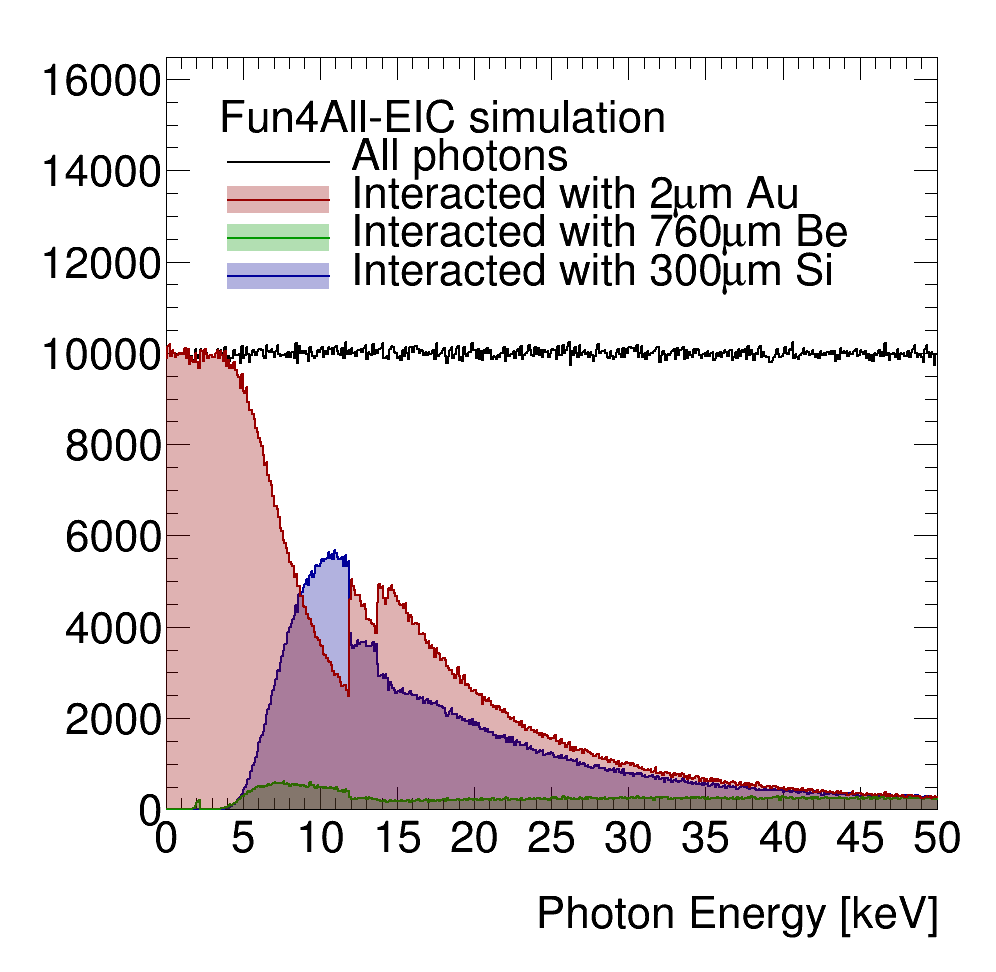

In [7]:
c1 = ROOT.TCanvas( 'PhotonIneraction', 'PhotonIneraction', 1000, 1000)
c1.Divide(1, 1);
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
# p.SetLogy();


hPhotonAu.SetLineColor(ROOT.kRed+2)
hPhotonAu.SetFillColorAlpha(ROOT.kRed+2,.3)
hPhotonBe.SetLineColor(ROOT.kGreen+2)
hPhotonBe.SetFillColorAlpha(ROOT.kGreen+2,.3)
hPhotonSilicon.SetLineColor(ROOT.kBlue+2)
hPhotonSilicon.SetFillColorAlpha(ROOT.kBlue+2,.3)

hAllPhoton.GetYaxis().SetRangeUser(0, hAllPhoton.GetMaximum()*1.6);
hAllPhoton.GetXaxis().SetRangeUser(0, 50);


hAllPhoton.Draw();
hPhotonSilicon.Draw("same");
hPhotonBe.Draw("same");
hPhotonAu.Draw("same");

ROOT.T
    
leg = ROOT.TLegend(.2, .7, .8, .9,   "Fun4All-EIC simulation");
leg.AddEntry(hAllPhoton, "All photons", "lf");
leg.AddEntry(hPhotonAu, "Interacted with 2#mum Au", "lf");
leg.AddEntry(hPhotonBe, "Interacted with 760#mum Be", "lf");
leg.AddEntry(hPhotonSilicon, "Interacted with 300#mum Si", "lf");
leg.Draw();

c1.Draw()

ROOT.SaveCanvas(c1,'PhotonIneraction', True);

In [8]:

hPhotonSiliconConverted = ROOT.TH1D('hPhotonSiliconConverted', ';Fraction of photon energy ionized', 100, 0, 1);
hPhotonBeConverted = ROOT.TH1D('hPhotonBeConverted', ';Fraction of photon energy ionized', 100, 0, 1);
hPhotonAuConverted = ROOT.TH1D('hPhotonAuConverted', ';Fraction of photon energy ionized', 100, 0, 1);

T.Draw('Sum$(G4HIT_SVTX.eion)*1e6/PhotonkeV >> hPhotonSiliconConverted','n_G4HIT_SVTX>0',"goff");
T.Draw('Sum$(G4HIT_PIPE.eion)*1e6/PhotonkeV >> hPhotonBeConverted','n_G4HIT_PIPE>0',"goff");
T.Draw('Sum$(G4HIT_PIPE_Au.eion)*1e6/PhotonkeV >> hPhotonAuConverted','n_G4HIT_PIPE_Au>0',"goff");

Save TH1 hPhotonSiliconConverted
Save TH1 hPhotonBeConverted
Save TH1 hPhotonAuConverted
removed ‘PhotonConversion.svg’


Info in <TCanvas::Print>: png file PhotonConversion.png has been created
Info in <TCanvas::SaveAs>: ROOT file PhotonConversion.root has been created
Info in <TCanvas::Print>: eps file PhotonConversion.eps has been created
Info in <TCanvas::Print>: SVG file PhotonConversion.svg has been created
Info in <TCanvas::SaveSource>: C++ Macro file: PhotonConversion.C has been generated


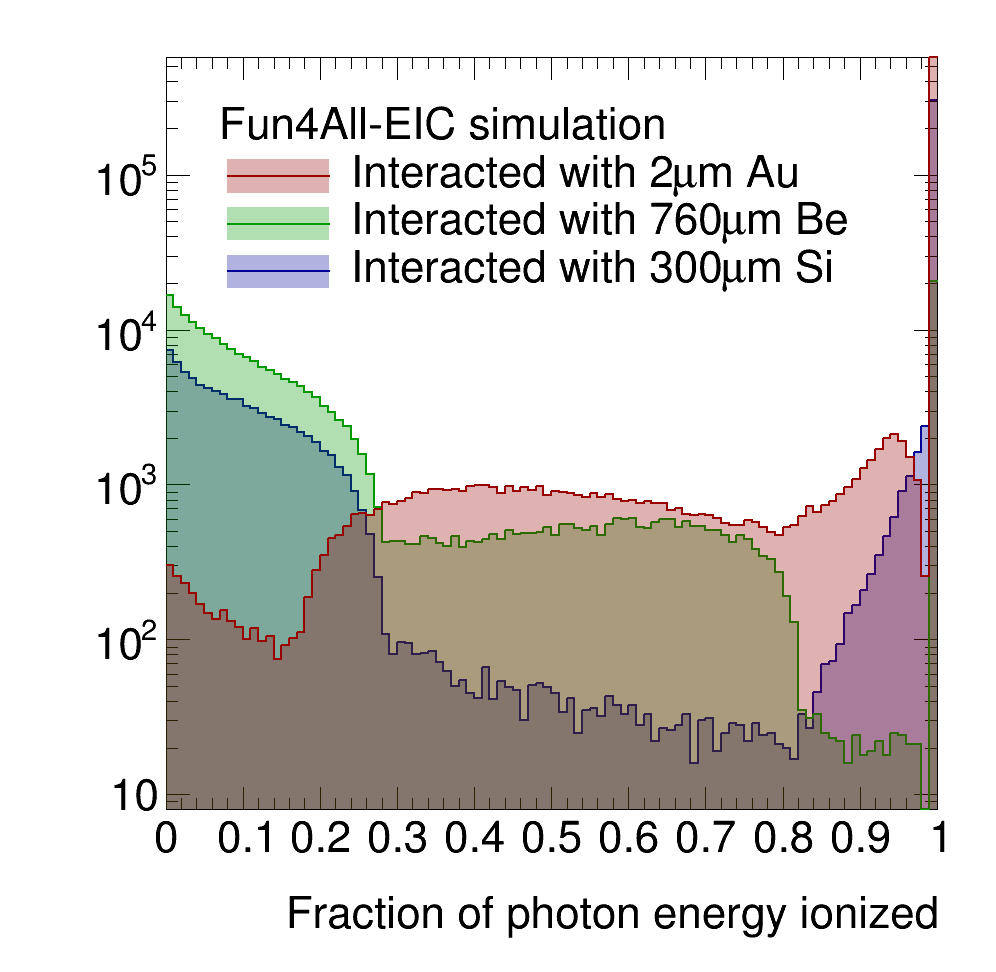

In [9]:
c1 = ROOT.TCanvas( 'PhotonConversion', 'PhotonConversion', 1000, 1000)
c1.Divide(1, 1);
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();


hPhotonAuConverted.SetLineColor(ROOT.kRed+2)
hPhotonAuConverted.SetFillColorAlpha(ROOT.kRed+2,.3)
hPhotonBeConverted.SetLineColor(ROOT.kGreen+2)
hPhotonBeConverted.SetFillColorAlpha(ROOT.kGreen+2,.3)
hPhotonSiliconConverted.SetLineColor(ROOT.kBlue+2)
hPhotonSiliconConverted.SetFillColorAlpha(ROOT.kBlue+2,.3)

# hAllPhoton.GetYaxis().SetRangeUser(0, hAllPhoton.GetMaximum()*1.6);

hAllPhoton.Draw();
hPhotonSiliconConverted.Draw();
hPhotonBeConverted.Draw("same");
hPhotonAuConverted.Draw("same");

    
leg = ROOT.TLegend(.2, .7, .8, .9,   "Fun4All-EIC simulation");
leg.AddEntry(hPhotonAuConverted, "Interacted with 2#mum Au", "lf");
leg.AddEntry(hPhotonBe, "Interacted with 760#mum Be", "lf");
leg.AddEntry(hPhotonSilicon, "Interacted with 300#mum Si", "lf");
leg.Draw();

c1.Draw()

ROOT.SaveCanvas(c1,'PhotonConversion', True);

In [10]:
hPhotonSiliconConverted2D = ROOT.TH2D('hPhotonSiliconConverted2D', ';Photon Energy [keV];Fraction of photon energy ionized in Si', 100, 0, 50, 100, 0, 1);

T.Draw('Sum$(G4HIT_SVTX.eion)*1e6/PhotonkeV:PhotonkeV >> hPhotonSiliconConverted2D','n_G4HIT_SVTX>0',"goff");

Save TH1 hPhotonSiliconConverted2D
removed ‘PhotonConversion2D.svg’


Info in <TCanvas::Print>: png file PhotonConversion2D.png has been created
Info in <TCanvas::SaveAs>: ROOT file PhotonConversion2D.root has been created
Info in <TCanvas::Print>: eps file PhotonConversion2D.eps has been created
Info in <TCanvas::Print>: SVG file PhotonConversion2D.svg has been created
Info in <TCanvas::SaveSource>: C++ Macro file: PhotonConversion2D.C has been generated


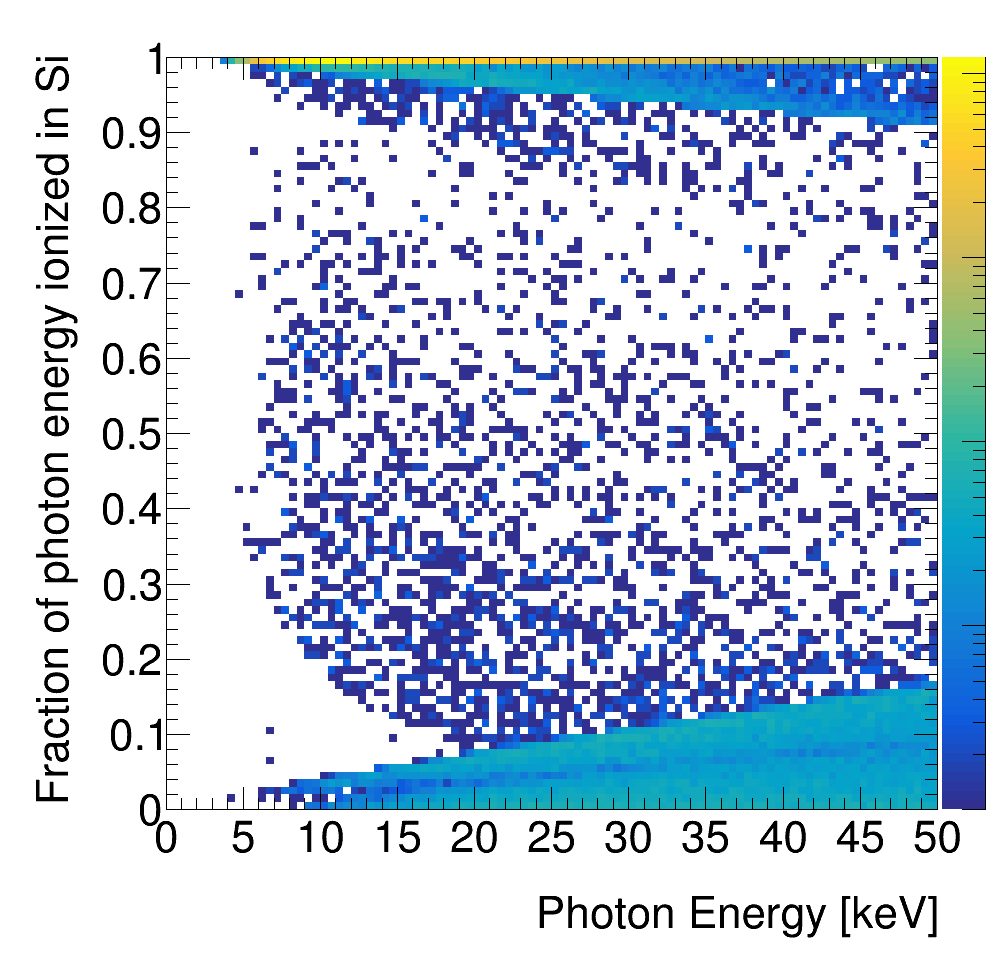

In [11]:
c1 = ROOT.TCanvas( 'PhotonConversion2D', 'PhotonConversion2D', 1000, 1000)
c1.Divide(1, 1);
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogz();
# p.SetRightMargin(.4);

# hAllPhoton.GetYaxis().SetRangeUser(0, hAllPhoton.GetMaximum()*1.6);

hPhotonSiliconConverted2D.Draw("COLZ");

    
# leg = ROOT.TLegend(.2, .7, .8, .9,   "Fun4All-EIC simulation");
# leg.AddEntry(hPhotonBe, "Interacted with 760#mum Be", "lf");
# leg.AddEntry(hPhotonSilicon, "Interacted with 300#mum Si", "lf");
# leg.Draw();

c1.Draw()

ROOT.SaveCanvas(c1,'PhotonConversion2D', True);

In [12]:
T.Scan("","Sum$(G4HIT_SVTX.eion)*1e6/PhotonkeV<.1 && n_G4HIT_SVTX>0 && Entry$<1000")

2

***********************************************************************************************************
*    Row   * Instance * n_G4HIT_S * G4HIT_SVT * G4HIT_SVT * G4HIT_SVT * G4HIT_SVT * G4HIT_SVT * G4HIT_SVT *
***********************************************************************************************************
*      308 *        0 *         1 *         0 *  33554432 *           *           *           *           *
*      918 *        0 *         1 *         0 *  33554432 *           *           *           *           *
***********************************************************************************************************
==> 2 selected entries


In [13]:
T.Show(85)

======> EVENT:85
 n_G4HIT_SVTX    = 0
 n_G4HIT_PIPE    = 0
 n_G4HIT_PIPE_Au = 0
 n_PHG4Particle  = 1
 PHG4Particle    = 1
 PHG4Particle.fUniqueID = 0
 PHG4Particle.fBits = 33554432
 PHG4Particle.fname = gamma
 PHG4Particle.fpid = 22
 PHG4Particle.fpx = 1.09572e-48
 PHG4Particle.fpy = -1.19254e-48
 PHG4Particle.fpz = -2.1767e-05
 PHG4Particle.barcode = -1
 PHG4Particle.trkid = 1
 PHG4Particle.vtxid = 1
 PHG4Particle.parentid = 0
 PHG4Particle.primaryid = 1
 PHG4Particle.fe = 2.1767e-05
 n_PHG4VtxPoint  = 1
 PHG4VtxPoint    = 1
 PHG4VtxPoint.fUniqueID = 0
 PHG4VtxPoint.fBits = 33554432
 PHG4VtxPoint.vx = -0.0876037
 PHG4VtxPoint.vy = -0.0253727
 PHG4VtxPoint.vz = 450
 PHG4VtxPoint.t0 = 0
 PHG4VtxPoint.id = 1


In [14]:
T.Show(374)

======> EVENT:374
 n_G4HIT_SVTX    = 0
 n_G4HIT_PIPE    = 0
 n_G4HIT_PIPE_Au = 0
 n_PHG4Particle  = 1
 PHG4Particle    = 1
 PHG4Particle.fUniqueID = 0
 PHG4Particle.fBits = 33554432
 PHG4Particle.fname = gamma
 PHG4Particle.fpid = 22
 PHG4Particle.fpx = -2.28412e-50
 PHG4Particle.fpy = -2.48063e-48
 PHG4Particle.fpz = -3.33425e-05
 PHG4Particle.barcode = -1
 PHG4Particle.trkid = 1
 PHG4Particle.vtxid = 1
 PHG4Particle.parentid = 0
 PHG4Particle.primaryid = 1
 PHG4Particle.fe = 3.33425e-05
 n_PHG4VtxPoint  = 1
 PHG4VtxPoint    = 1
 PHG4VtxPoint.fUniqueID = 0
 PHG4VtxPoint.fBits = 33554432
 PHG4VtxPoint.vx = -0.00293707
 PHG4VtxPoint.vy = 0.0045369
 PHG4VtxPoint.vz = 450
 PHG4VtxPoint.t0 = 0
 PHG4VtxPoint.id = 1


In [16]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html PhotonConversion.ipynb')

0

[NbConvertApp] Converting notebook PhotonConversion.ipynb to html
[NbConvertApp] Writing 458999 bytes to PhotonConversion.html
